# TASK 3  Machine Learning Intern @Codsoft 

# 📚 Spam Classifier: SMS 📩
Python · Spam SMS Collection Dataset 
OBJECTIVES:- Build an AI model that can classify SMS messages as spam or legitimate. Use techniques like TF-IDF or word embeddings with classifiers like Naive Bayes, Logistic Regression, or Support Vector Machines to identify spam messages



# 1) Import Dependencies 📦📚 

In [1]:
!pip install xgboost


In [2]:
!pip install wordcloud 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.naive_bayes import GaussianNB,MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud
from collections import  Counter
import nltk
import pickle
import string 



%matplotlib inline
nltk.download('punkt')
nltk.download('stopwords')
import warnings
warnings.filterwarnings("ignore") 

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Shubhajinkya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Shubhajinkya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## 2) Load Dataset 

In [4]:
# Importing Dataset 
data=pd.read_csv("spam_dataset_1.csv") 
data 

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [5]:
# Specify the columns to drop
columns_to_drop = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']
# Use the drop method to remove the specified columns
data.drop(columns=columns_to_drop, inplace=True)
data 

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


# 3) Data Preprocessing 🔄🔢 

In [6]:
# Rename the Features
data.rename(columns={"v1": "Output","v2": "Input"}, inplace = True) 


In [7]:
data.head(5) 

,Output,Input
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


🏷️ Label Encoder 🏷️ 

In [8]:
# Encoding Target Feature 
le = LabelEncoder()
data["Output"] = le.fit_transform(data["Output"]) 
data.head(5) 

,Output,Input
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


# 4) (EDA)📊 Exploratory Data Analysis 📊

In [9]:
#Check shape of dataset 
data.shape 

(5572, 2)

our dataset 5572 rows and 2 columns 

In [10]:
#Check info our dataset 
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Output  5572 non-null   int32 
 1   Input   5572 non-null   object
dtypes: int32(1), object(1)
memory usage: 65.4+ KB


In [11]:
#Check describe our dataset
data.describe() 

,Output
count,5572.000000
mean,0.134063
std,0.340751
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [12]:
# Check Null Values
data.isnull().sum()  

Output    0
Input     0
dtype: int64

No null value in our dataset 

In [13]:
# Check Duplicate Values
data.duplicated().sum() 

403

403 duplicated value in our dataset 

In [14]:
# Drop Duplicates
data= data.drop_duplicates(keep="first") 
data 

,Output,Input
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [15]:
# Ham & Spam Counts
data["Output"].value_counts() 

Output
0    4516
1     653
Name: count, dtype: int64

# 🥧 Pie Chart 📈

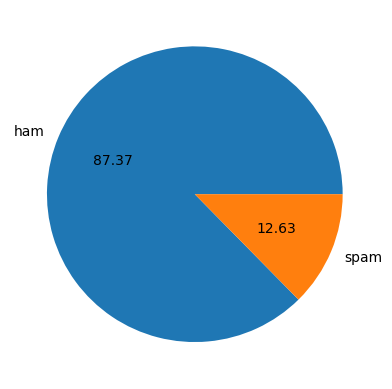

In [16]:
plt.pie(data["Output"].value_counts(),autopct = "%.2f", labels=['ham','spam'])
plt.show() 

# Obsrevations:
Data is Inblanced 
Having Less Spam Messages in Dataset

# 5)  Feature Engineering 🔧

In [17]:
# Total No. of Characters in Data
data["characters"] = data["Input"].apply(len)
data.head(5) 

,Output,Input,characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [18]:
# Total No. of Words in Data
data["word"] = data["Input"].apply(lambda x:len( nltk.word_tokenize(x))) 
data.head(5) 

,Output,Input,characters,word
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [19]:
# Total No. of Sentence
data["sentence"] = data["Input"].apply(lambda x:len(nltk.sent_tokenize(x)))
data.head(5) 

,Output,Input,characters,word,sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [20]:
# Statistical Analysis of new features
data[["characters","word", "sentence"]].describe() 
data

,Output,Input,characters,word,sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [21]:
# Statistical Analysis for HAM Data
data[data["Output"]==0][["characters","word", "sentence"]].describe()
data 

,Output,Input,characters,word,sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [22]:
# Statistical Analysis for SPAM Data
data[data["Output"] ==1][["characters","word", "sentence"]].describe() 
data 

,Output,Input,characters,word,sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


# 📊 Histogram Plot 📊

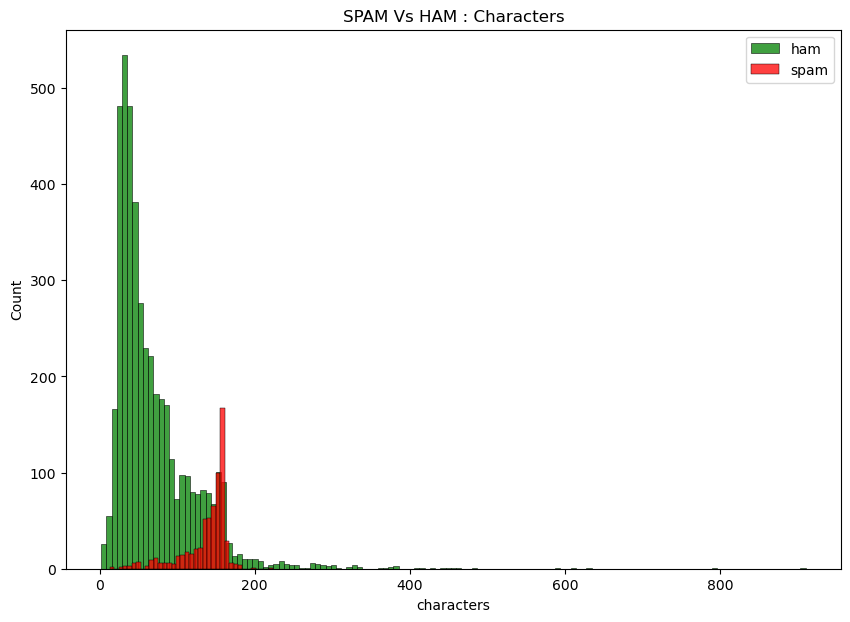

In [23]:
plt.figure(figsize=(10,7))
sns.histplot(data[data["Output"]==0]["characters"],label= "ham",color="green")
sns.histplot(data[data["Output"]==1]["characters"],label= "spam",color = "red")
plt.title("SPAM Vs HAM : Characters")
plt.legend()
plt.show() 

# Observations:
Ham Characters and Words are more than Spam

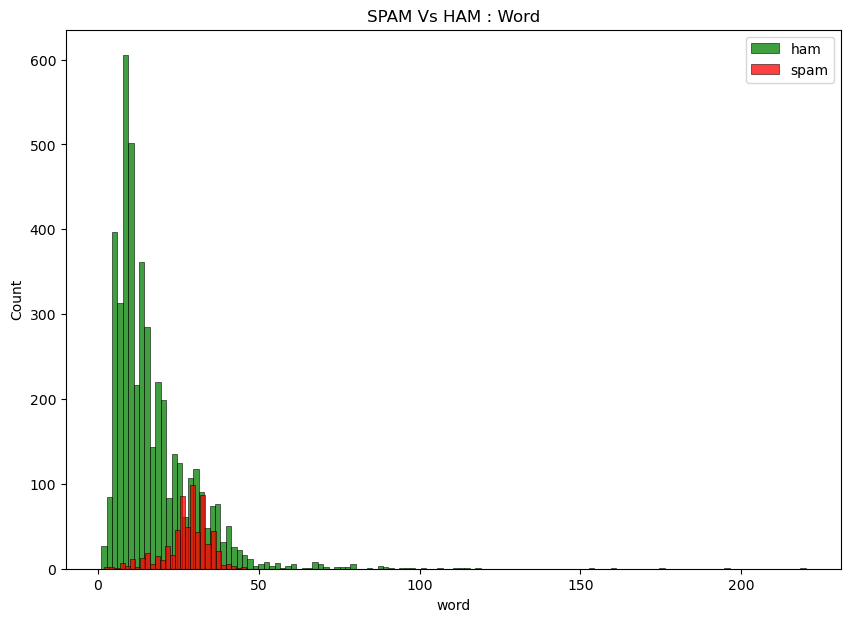

In [24]:
plt.figure(figsize=(10,7))
sns.histplot(data[data["Output"]==0]["word"],label= "ham",color="green")
sns.histplot(data[data["Output"]==1]["word"],label= "spam",color = "red")
plt.title("SPAM Vs HAM : Word")
plt.legend()
plt.show() 

# Observations:
Ham Characters and Words are more than Spam

# Pair Plot 🌌

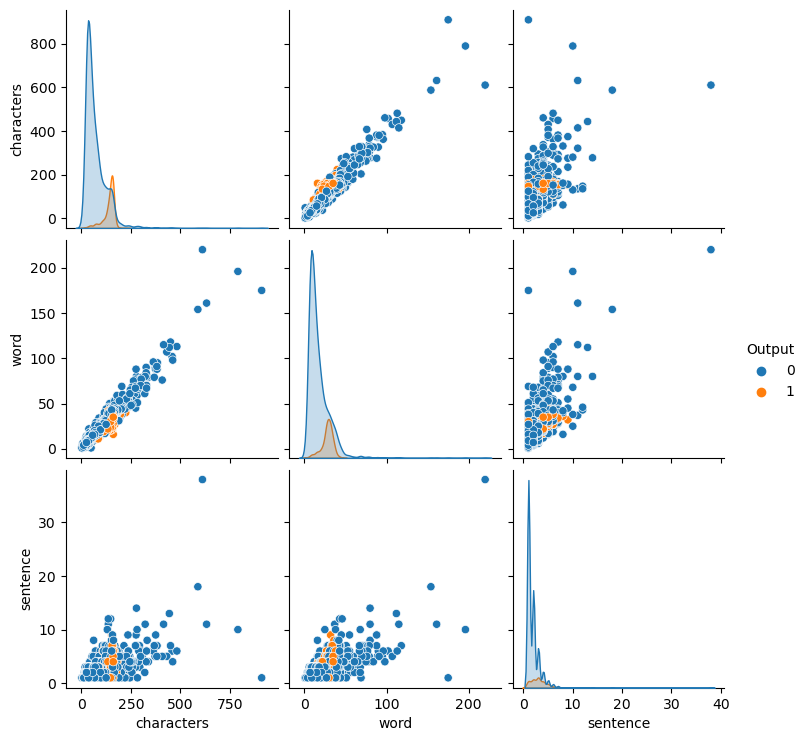

In [25]:
sns.pairplot(data,hue="Output") 

# Observations:
Outliers are present

In [26]:
# Intilizing Porter Stemmer Class
ps = PorterStemmer()

In [27]:
# This Function helps to get Ready!!!

def data1(text):
    text = text.lower()               #  Converts Text in Lower Case
    text = nltk.word_tokenize(text)   #  Breaks Text in Words 
    
    y = []
    for i in text:
        if i.isalnum():               #  Removing Special Characters
            y.append(i)
    
    text = y[:]
    y.clear()
    for i in text:                    #  Removing Stopwords and Punctuation
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:                    #  Porter Stemmer removing unwanted words
        y.append(ps.stem(i))
        
    return " ".join(y) 

In [28]:
# Checking data function 
data1("aai and papa are everything for me") 

'aai papa everyth'

In [29]:
data.sample(2)

,Output,Input,characters,word,sentence
4226,0,Buy one egg for me da..please:),31,10,1
3928,0,Yes. Nigh you cant aha.,23,7,2


In [30]:
# Transforming dataset using the "data" function in new column "new_data"
data["new_data"] = data["Input"].apply(data1)

In [31]:
data.sample(5) 

,Output,Input,characters,word,sentence,new_data
1926,0,Dont give a monkeys wot they think and i certa...,135,33,3,dont give monkey wot think certainli mind frie...
3718,1,"Thanks for your ringtone order, reference numb...",197,38,4,thank rington order refer number x49 mobil cha...
3074,0,Take us out shopping and Mark will distract Is...,53,9,1,take us shop mark distract
4146,0,Pls help me tell sura that i'm expecting a bat...,139,30,3,pl help tell sura expect batteri hont pl send ...
1378,0,"Ya tel, wats ur problem..",25,7,1,ya tel wat ur problem


# 6) Modile Building 

# 🌫️ Word Cloud ☁️

In [32]:
wc = WordCloud(
    background_color=None,
    width=800,
    height=400
)

In [33]:
# Wordcloud for SPAM
spam_wc = wc.generate(data[data["Output"] ==1]["new_data"].str.cat(sep=" "))

# Wordcloud for HAM
ham_wc = wc.generate(data[data["Output"] ==0]["new_data"].str.cat(sep=" ")) 

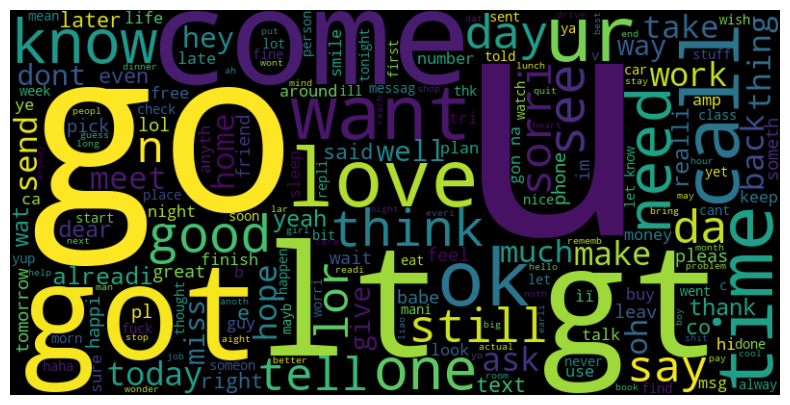

In [34]:
# SPAM 
plt.figure(figsize=(10, 5))
plt.imshow(spam_wc, interpolation="bilinear")
plt.axis("off")
plt.show() 

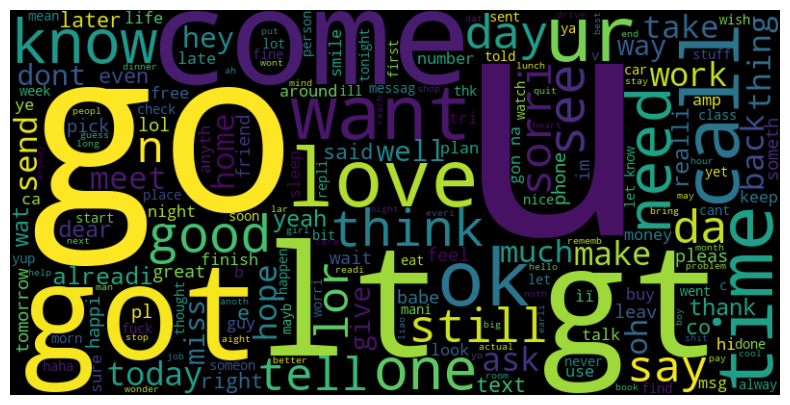

In [35]:
# HAM
plt.figure(figsize=(10, 5))
plt.imshow(ham_wc, interpolation="bilinear")
plt.axis("off")
plt.show() 

In [36]:
# Spliting SPAM Sentences in Words
spam_corpus = []
for msg in data[data["Output"]==1]["new_data"].tolist():
    for word in msg.split():
        spam_corpus.append(word)  

# 📊 Bar Plot 📊 

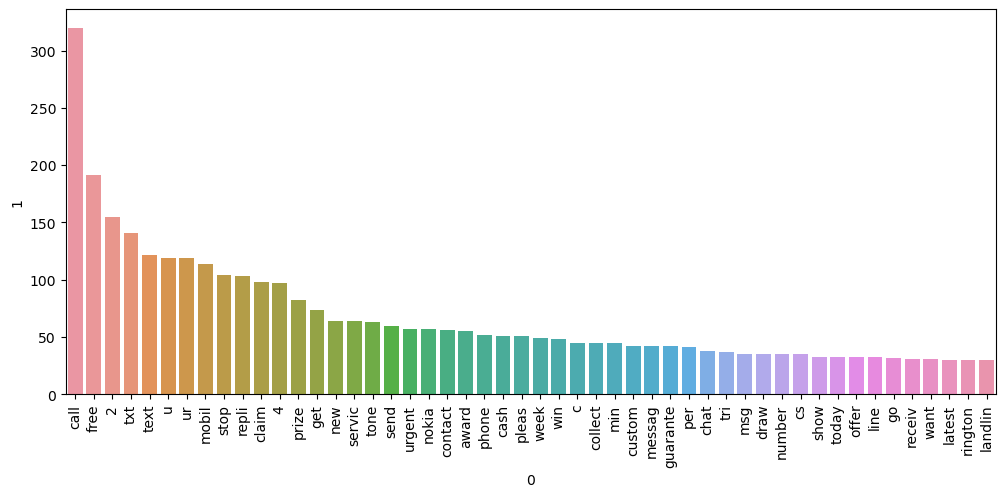

In [37]:
# Top 50 SPAM Words
a=pd.DataFrame(Counter(spam_corpus).most_common(50))[0]
b=pd.DataFrame(Counter(spam_corpus).most_common(50))[1]
plt.figure(figsize=(12,5))
sns.barplot(x= a,y=b)
plt.xticks(rotation=90)

plt.show() 

In [38]:
# Spliting HAM Sentences in Words
ham_corpus = []
for msg in data[data['Output'] == 0]['new_data'].tolist():
    for word in msg.split():
        ham_corpus.append(word)  

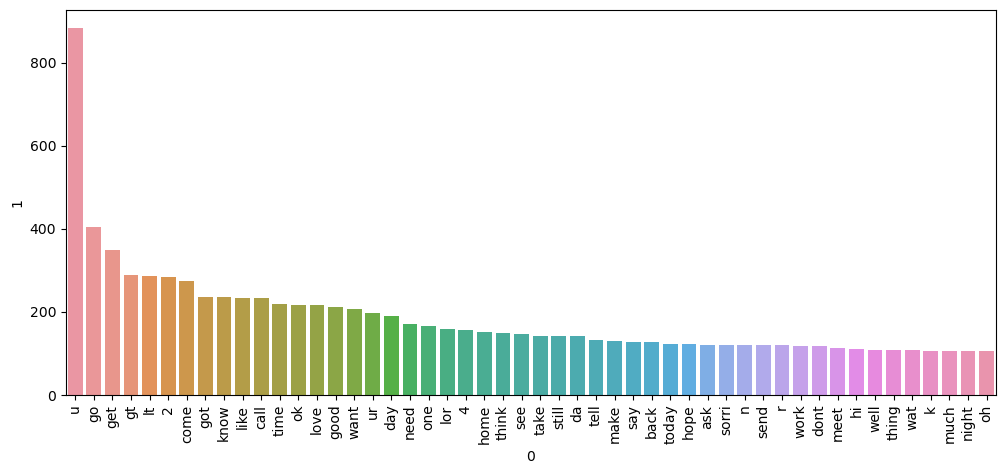

In [39]:
# Top 50 HAM Words
a=pd.DataFrame(Counter(ham_corpus).most_common(50))[0]
b=pd.DataFrame(Counter(ham_corpus).most_common(50))[1]
plt.figure(figsize=(12,5))
sns.barplot(x= a,y=b)
plt.xticks(rotation=90)

plt.show()

# TFID 🔤 Vectorization 🔤

In [40]:
# Initilizing TFIDF Vectorizer
tfidv = TfidfVectorizer(max_features=3000)
tfidv

TfidfVectorizer(max_features=3000)

In [41]:
# Independent Feature
X = tfidv.fit_transform(data["new_data"]).toarray()
X 

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [42]:
# Dependent Feature
y = data["Output"].values 
y 

array([0, 0, 1, ..., 0, 0, 0])

In [43]:
# Performing Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2) 

# 🎓 Models Training 🤖

In [44]:
# Models that are going to be trained
models={
    "Gaussian NB" : GaussianNB(),
    "Multinomial NB" : MultinomialNB(),
    "Bernoulli NB" : BernoulliNB(),
    "Logistic Regression" : LogisticRegression(),
    "SVC" : SVC(),
    "Decision Tree" : DecisionTreeClassifier(),
    "KNN" : KNeighborsClassifier(),
    "Bagging CLF" : BaggingClassifier(),
    "Random Forest" : RandomForestClassifier(),
    "ETC" : ExtraTreesClassifier(),
    "Ada Boost" : AdaBoostClassifier(),
    "Gradient Boost" : GradientBoostingClassifier(),
    "XGB" : XGBClassifier(),
    "XGBRF" : XGBRFClassifier()
} 

In [45]:
# Creating a function train each model and calculate/return accuracy and precision
def train_clf (model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    pre = precision_score(y_test, y_pred)
    
    return acc, pre 

In [46]:
# A FOR loop Calls "traim_clf" for each model and stores accuracy and precision
acc_s=[]
pre_s=[]

for name, model in models.items():
    accuracy, precision = train_clf(model, X_train, y_train, X_test, y_test)
    
    acc_s.append(accuracy)
    pre_s.append(precision) 

  File "C:\Users\Shubhajinkya\Sukhada\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 199, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\Shubhajinkya\Sukhada\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Shubhajinkya\Sukhada\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\Shubhajinkya\Sukhada\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


In [47]:
# As Precision matter over Accuracy in this Data, Sorting in DESC order of Precision. All Scores of Models

scores_data= pd.DataFrame({"Algorithm": models.keys(), 
                          "Accuracy": acc_s, 
                         "Precision": pre_s}).sort_values(by="Precision", ascending=False) 

# 📈 Algorithms: Accuracy and Precision 🎯

In [48]:
scores_data

,Algorithm,Accuracy,Precision
1,Multinomial NB,0.970986,1.000000
6,KNN,0.905222,1.000000
2,Bernoulli NB,0.983559,0.991870
8,Random Forest,0.976789,0.991379
4,SVC,0.972921,0.982456
3,Logistic Regression,0.956480,0.979381
9,ETC,0.978723,0.975410
12,XGB,0.971954,0.943089
10,Ada Boost,0.960348,0.936937
11,Gradient Boost,0.954545,0.933333


# 📊 Scores Bar Plot 📊¶

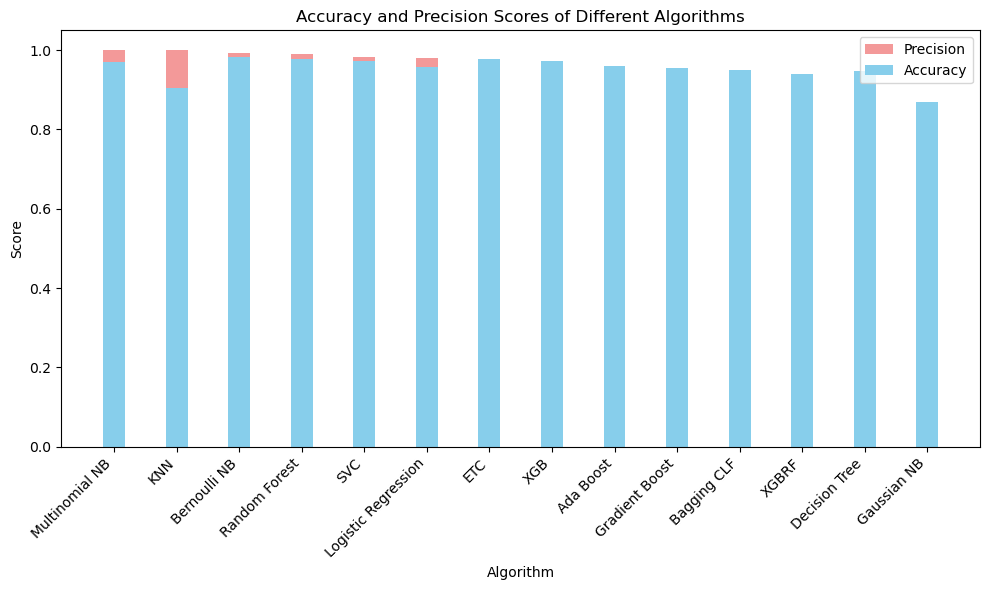

In [49]:
# Graph Accuracy and Precision

plt.figure(figsize=(10, 6))
bar_width = 0.35

plt.bar(scores_data["Algorithm"], scores_data["Precision"], width=bar_width, label="Precision", color='lightcoral', alpha=0.8)
plt.bar(scores_data["Algorithm"], scores_data["Accuracy"], width=bar_width, label="Accuracy", color='skyblue')
plt.xlabel("Algorithm")
plt.ylabel("Score")
plt.title("Accuracy and Precision Scores of Different Algorithms")
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show() 

# Observations:
Models with high precision scores, such as Multinomial NB (100.00%), KNN (100.00%), and Bernoulli NB (99.17%), have a high ability to correctly identify positive instances.
Models with high accuracy scores, such as Bernoulli NB (98.16%) and Random Forest (97.49%), make accurate overall predictions on the dataset.

In [50]:
# Hence Multinomial Naïve Bayes give excellent precision and accuracy scores.
# According to me MNB is sutaible for Model

mnb=MultinomialNB()
mnb.fit(X_train, y_train) 

MultinomialNB()

# Pickle Files 📌

In [51]:
# Pickle files help in Model Deployment

pickle.dump(mnb,open("model.pkl","wb"))
pickle.dump(tfidv, open("tfidf.pkl","wb"))
pickle.dump(data,open("fun.pkl","wb")) 